# Hough Lines

Following OpenCV functions are relevant for us to learn in this exercise although we are not going to make use of all of them

* [HoughLines](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a) - It finds lines in a binary image using the standard Hough transform.
* [HoughLinesP](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb) - It finds lines in a binary image using the probabilistic Hough transform.
* [HoughCircles](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d) - It find the circular boundaries in binary image using the Hough Transform.

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Import resources and display the image

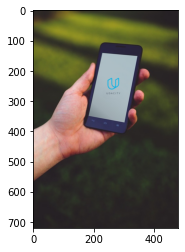

In [113]:
# Read in the image
image: np.ndarray = cv2.imread('images/phone.jpg')
image = cv2.cvtColor(image, code=cv2.COLOR_BGR2RGB)
gray_image: np.ndarray = cv2.imread(filename='images/phone.jpg', flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

### Perform edge detection

Input to Hough Transform is the binary image. Hence we have to create one. We have options to apply some edge detection kernel like Sobel and create the binary image ourselves using threshold or we can directly use the [Canny](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) edge detector, which automatically produces a binary image.

Unique pixel intensities in the edge map: [  0 255]


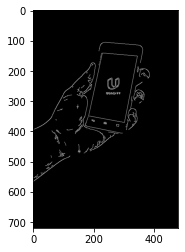

In [114]:

# Define our parameters for Canny
low_threshold: np.ndarray = 50
high_threshold: np.ndarray = 100
edges = cv2.Canny(image=gray_image, threshold1=low_threshold, threshold2=high_threshold)
print(f'Unique pixel intensities in the edge map: {np.unique(edges)}')
plt.imshow(edges, cmap='gray');

### Find lines using a Hough transform

As we have understood in the theory, that the Hough Transform maps the edge points from the image space to the parameter (Hough) space. And the the parameters used for the same are `rho`, which is the straight line distance to the point from the origin, and `theta`, which is the angle that the line makes to the positive x-axis.

OpenCV works with the convention of accumulator array. Accumulator array is a space spanned by all the possible values of `rho` and `theta`. Following is a description of the parameters, which are useful for line detection.

* `rho` - Distance resolution for accumulator in pixels. Here, this value represents a unit distance in the image space in terms of pixels.
* `theta` - Angle resolution for the accumulator in radians. Here, this value represents a unit angle in the spherical polar coordinates, which ranges in [0 pi].
* `threshold` - How many intersections are required to determine, that the (rho theta) parameter values denote a line in the image space.
* `minLineLength` - A lower threshold for the minimum length to be considered for a line to be detected.
* `maxLineGap` - An upper threshold for the gaps between discontinuous line segments in the edge map.

In [115]:
def detect_lines(bin_img: np.ndarray, rho: float, theta: float, 
                threshold: int, min_line_length: float, max_line_gap: float) -> np.ndarray:
    """Detects lines using the probabilistic Hough Transform on the passed in binary image"""
    np.testing.assert_equal(np.unique(bin_img), np.array([0, 255]))
    boundary_lines: np.ndarray = cv2.HoughLinesP(
        image=bin_img,
        rho=rho,
        theta=theta,
        threshold=threshold,
        minLineLength=min_line_length,
        maxLineGap=max_line_gap
    )
    return boundary_lines

In [116]:
# Define the Hough transform parameters as starter experiment
rho: float = 1
theta: float = np.pi / 180
threshold: int = 60
min_line_length: float = 50
max_line_gap: float = 5

# Run Hough on the edge-detected image
boundary_lines: np.ndarray = detect_lines(bin_img=edges, rho=rho, 
                                            theta=theta, threshold=threshold, 
                                            min_line_length=min_line_length,
                                            max_line_gap=max_line_gap)
print(f'Lines shape: {boundary_lines.shape}')

Lines shape: (10, 1, 4)


The the `HoughLinesP` functions has determined the boundaries in terms of coordinates. The boundary_lines array in this case are the coordinates for the start and end of these boundary lines. For a 2D image these coordinates are represented using (1, 4) shaped array elements. Semantically they are of the form (x1: int, y1: int) , (x2: int, y2: int).
We are going to iterate over each of these (x1, y1) , (x2, y2) pairs and draw lines on a copy of the original image.

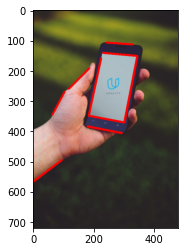

In [117]:
# Create an image copy to draw lines on
copied_image: np.ndarray = np.copy(image)

# Iterate over the output "lines" and draw lines on the image copy
for line in boundary_lines:
    for x1,y1,x2,y2 in line:
        cv2.line(copied_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(copied_image, cmap='gray');

We observe here, that we have detected several straight line boundaries in the image. Asa result we have detected lines not only on the phone, but also on the hands. Let's assume, that we are only interested in detecting the phone boundary. We can achieve that by tweaking the `minLineLength` parameter, because it controls the minimum length of the lines to be detected.

In [118]:
# Define the Hough transform parameters as starter experiment
min_line_length: float = 100

# Run Hough on the edge-detected image
boundary_lines: np.ndarray = detect_lines(bin_img=edges, rho=rho, 
                                            theta=theta, threshold=threshold, 
                                            min_line_length=min_line_length,
                                            max_line_gap=max_line_gap)
print(f'Lines shape: {boundary_lines.shape}')

Lines shape: (6, 1, 4)


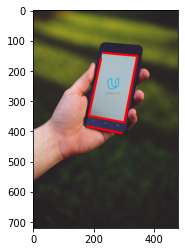

In [119]:
# Create an image copy to draw lines on
copied_image: np.ndarray = np.copy(image)

# Iterate over the output "lines" and draw lines on the image copy
for line in boundary_lines:
    for x1,y1,x2,y2 in line:
        cv2.line(copied_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(copied_image, cmap='gray');

Now by using a higher threshold for minLineLength we have managed to get rid of the lines detected on the hand.